<a href="https://colab.research.google.com/github/fatimazain118/SVM-Kernel-and-Stacking-Ensemble/blob/main/Maven_K_fold_SVM_Models_%26_Stacking_Ensemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier
from matplotlib import pyplot

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [17]:
Zain = pd.read_csv("/content/gdrive/MyDrive/Datasets/maven 3.3.3-3.3.9.csv")
Zain.shape

(831, 8)

In [19]:
Zain['Change'] = Zain['Change'].map({'yes': 1, 'no': 0})

In [20]:
Zain.head()

,CBO,NOC,WMC,RFC,SLOC,DIT,LCOM,Change
0,22,10,13,26,237,1,73,0
1,2,0,5,18,40,0,40,0
2,4,0,11,24,71,0,27,0
3,2,2,3,16,15,0,0,0
4,3,0,1,14,7,0,0,0


In [21]:
X = Zain.drop('Change', axis=1)
y = Zain['Change']

In [22]:
def get_stacking():
	# define the base models
	level0 = list()
	level0.append(('sig', SVC(kernel='sigmoid')))
	level0.append(('lin', SVC(kernel='linear')))
	level0.append(('poly', SVC(kernel='poly')))
	level0.append(('rbf', SVC(kernel='rbf')))
	# define meta learner model
	level1 = SVC(kernel='rbf')
	# define the stacking ensemble
	model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
	return model

In [23]:
def get_models():
	models = dict()
	models['lin'] = SVC(kernel='linear')
	models['sig'] = SVC(kernel='sigmoid')
	models['poly'] = SVC(kernel='poly')
	models['rbf'] = SVC(kernel='rbf')

	models['stacking'] = get_stacking()
	return models

In [24]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
def evaluate_model(model, X, y):
	kfold_validation=KFold(4)
	scores = cross_val_score(model,X,y,cv=kfold_validation)
	return scores

In [25]:
models = get_models()

In [26]:
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>lin 0.763 (0.020)
>sig 0.626 (0.037)
>poly 0.718 (0.009)
>rbf 0.744 (0.026)
>stacking 0.735 (0.032)


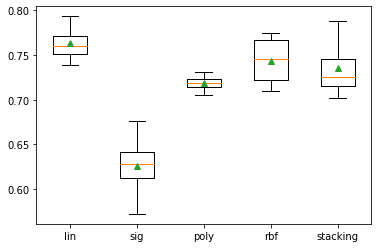

In [27]:
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()